# City Selection Model Weights

### Purpose of this notebook is to train the model for predicting passenger traffic for a city for a given year
### Weights of this model will subsequently be saved and used by the web server while selecting city to consider adding to network

In [1]:
import numpy as np
import pandas as pd

import geopy.distance

from sklearn.decomposition import PCA

import shutil
import os

import time
import json

from collections import OrderedDict

## Load PreProcessor & all tier-I/II cities
### We also process all datasets and store the preprocessed datasets in 'PreProcessed_Datasets/' folder. All preprocessed datasets can now be accessed by PreProcessor class

In [2]:
from utils.PreProcessor import PreProcessor
preprocessor = PreProcessor(sample_names = ['AirAsia_India', 'Akasa_Air', 'Star_Air'], preprocess_all_raw_data = True)

tier_1_2_cities_raw = [
    'Ahmedabad', 'Bengaluru', 'Mumbai', 'Pune', 'Chennai', 'Hyderabad', 'Kolkata', 'Delhi', 'Visakhapatnam', 'Guwahati', 'Patna',
    'Raipur', 'Gurugram', 'Shimla', 'Jamshedpur', 'Thiruvananthapuram', 'Bhopal', 'Bhubaneswar', 'Amritsar', 'Jaipur', 'Lucknow', 'Dehradun'
]
tier_1_2_cities_raw = tier_1_2_cities_raw + (
    "Guntur, Kakinada, Kurnool, Nellore, Rajamahendravaram, Vijayawada".split(', ')
) + (
    "Bilaspur, Bhilai".split(', ')
) + (
    "Anand, Bhavnagar, Dahod, Jamnagar, Rajkot, Surat, Vadodara".split(', ')
) + (
    "Faridabad, Karnal".split(', ')
) + (
    "Hamirpur".split(', ')
) + (
    "Bokaro Steel City, Dhanbad, Ranchi".split(', ')
) + (
    "Belagavi, Hubballi-Dharwad, Kalaburagi, Mangaluru, Mysuru, Vijayapura".split(', ')
) + (
    "Kannur, Kochi, Kollam, Kozhikode, Malappuram, Thrissur".split(', ')
) + (
    "Gwalior, Indore, Jabalpur, Ratlam, Ujjain".split(', ')
) + (
    "Amravati, Aurangabad, Bhiwandi, Dombivli, Jalgaon, Kolhapur, Nagpur, Nanded, Nashik, Sangli, Solapur, Vasai-Virar".split(', ')
) + (
    "Cuttack, Rourkela".split(', ')
) + (
    "Jalandhar, Ludhiana".split(', ')
) + (
    "Ajmer, Bikaner, Jodhpur".split(', ')
) + (
    "Coimbatore, Erode, Madurai, Salem, Thanjavur, Tiruchirappalli, Tirunelveli, Tiruvannamalai, Vellore".split(', ')
) + (
    "Warangal".split(', ')
) + (
    "Agra, Aligarh, Bareilly, Ghaziabad, Gorakhpur, Jhansi, Kanpur, Mathura, Meerut, Moradabad, Noida, Prayagraj, Varanasi".split(', ')
) + (
    "Asansol, Berhampore, Burdwan, Durgapur, Purulia, Siliguri".split(', ')
) + (
    "Chandigarh, Jammu, Puducherry, Srinagar".split(', ')
)

**************************************
Converting Raw Datasets into PreProcessed Datasets
Opening AirRouteDatasets - Flights
Opening AirRouteDatasets - Airports
Airports which are included in routes but not in airport list are -
None
Opening International AirRouteDatasets - Flights
Opening AirRouteDatasets - IntlAirports
Airports which are included in routes but not in airport list are -
None
Opening Sample AirRouteDatasets
Opening City-pair wise Domestic Passengers Data
Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Opening Economic Data
Opening Population, Area & Household Data
Opening Population Trend Data
A-2
A-2 
A-2
A-2
A-2 
A-2 
A-2
 A-2
A-2
A-2
A-2 
A-2
 A-2
ALERT! Found copy district  pratapgarh in states  rajasthan  and  uttar pradesh
A-2 
ALERT! Found copy district  raigarh in states  maharashtra  and  chhattisgarh
A-2 
A-2 
A-2
A-2
ALERT! Found copy district  aurangabad in states  bihar  and  maharashtra
 A-2
ALERT! Found copy district  hamirpur in states  himachal pradesh  and  uttar pradesh
ALERT! Found copy district  bilaspur in states  himachal pradesh  and  chhattisgarh
A-2
A-2 
A-2 
Opening Latest Population Data
Opening Education Data
Opening Monument Visitors Data - Visitors Data
Opening Monument Visitors Data - Tourist Location Coordinates
Opening Indian Railways Data
Opening District Centroid Data
Opening Station Codes Data
Opening Indian Railways Data
0 Trains Scanned out of 5208!
500 Trains Scanned out of 5208!
1000 Trains Scanned out of 5208!
1500 Trains Scanned out of 5208

## Store City Info for each city
### Source: ChatGPT

In [3]:
city_info = {
    'Ahmedabad': 'Located in the western state of Gujarat, known for its textile industry, and emerging as an IT hub.',
    'Bengaluru (Bangalore)': 'Located in the southern state of Karnataka, known as the "Silicon Valley" of India for its thriving IT industry, and also known for its pleasant climate.',
    'Chennai': 'Located in the southern state of Tamil Nadu, known as the "Detroit of India" for its automobile industry, and also known for its rich cultural heritage and cuisine.',
    'Delhi': 'Located in the northern part of India, the capital of the country, known for its historical monuments, political importance, and emerging as a major business hub.',
    'Hyderabad': 'Located in the southern state of Telangana, known as the "City of Pearls" for its historical significance in the pearl trade, and also emerging as a major IT hub.',
    'Kolkata': 'Located in the eastern state of West Bengal, known as the "Cultural Capital" of India for its rich literary, artistic, and cultural heritage, and also known for its historical significance as a major trading port.',
    'Mumbai': 'Located in the western state of Maharashtra, the financial capital of India, known for its Bollywood film industry, and also known for its iconic landmarks such as the Gateway of India and the Marine Drive.',
    'Pune': 'Located in the western state of Maharashtra, known as the "Oxford of the East" for its academic institutions, and also known for its thriving IT industry and pleasant climate.',
    'Agra': 'Located in the northern state of Uttar Pradesh, famous for the iconic Taj Mahal, one of the seven wonders of the world, and also known for its historical significance as a major Mughal empire city.',
    'Ajmer': 'Located in the northern state of Rajasthan, known for the famous Ajmer Sharif Dargah, a popular Muslim pilgrimage site, and also known for its historical significance as a major Mughal empire city.',
    'Akola': 'Located in the western state of Maharashtra, known for its agriculture and textile industries, and also emerging as a major educational hub.',
    'Aligarh': 'Located in the northern state of Uttar Pradesh, known for its famous Aligarh Muslim University, and also known for its historical significance as a major Mughal empire city.',
    'Allahabad': 'Located in the northern state of Uttar Pradesh, known for the famous Kumbh Mela, the largest religious gathering in the world, and also known for its historical significance as a major Mughal empire city.',
    'Amravati': 'Located in the western state of Maharashtra, known for its agriculture and textile industries, and also emerging as a major educational hub.',
    'Amritsar': 'Located in the northern state of Punjab, known for the famous Golden Temple, the most important Sikh pilgrimage site, and also known for its historical significance as a major Mughal empire city.',
    'Asansol': 'Located in the eastern state of West Bengal, known for its coal and steel industries, and also emerging as a major educational and cultural hub.',
    'Aurangabad': 'Located in the western state of Maharashtra, known for the famous Ajanta and Ellora caves, UNESCO World Heritage sites, and also emerging as a major industrial hub.',
    'Bareilly': 'Located in the northern state of Uttar Pradesh, known for its agriculture and textile industries, and also emerging as a major educational hub.',
    'Belgaum': 'Located in the southern state of Karnataka, known for its historic landmarks and cultural heritage, and also emerging as a major industrial and commercial center.',
    'Bhavnagar': 'Located in the western state of Gujarat, known for its shipbuilding and salt industries, and also emerging as a major education and tourism hub.',
    'Bhiwandi': 'Located in the western state of Maharashtra, known for its textile industry, and also emerging as a major warehousing and logistics hub.',
    'Bhopal': 'Located in the central state of Madhya Pradesh, known as the "City of Lakes" for its many natural and man-made lakes, and also emerging as a major educational and industrial hub.',
    'Bhubaneswar': 'Located in the eastern state of Odisha, known as the "Temple City" for its many historic temples, and also emerging as a major IT and education hub.',
    'Bikaner': 'Located in the northern state of Rajasthan, known for its historic forts and palaces, and also emerging as a major center for the food processing industry.',
    'Bilaspur': 'Located in the central state of Chhattisgarh, known for its coal mining industry, and also emerging as a major educational and industrial hub.',
    'Bokaro Steel City': 'Located in the eastern state of Jharkhand, known for its steel industry, and also emerging as a major educational and cultural center.',
    'Chandigarh': 'Located in the northern part of India, known as the "City Beautiful" for its well-planned architecture and green spaces, and also emerging as a major center for IT and education.',
    'Coimbatore': 'Located in the southern state of Tamil Nadu, known for its textile and engineering industries, and also emerging as a major center for IT and education.',
    'Cuttack': 'Located in the eastern state of Odisha, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Dehradun': 'Located in the northern state of Uttarakhand, known for its natural beauty and pleasant climate, and also emerging as a major center for education and tourism.',
    'Dhanbad': 'Located in the eastern state of Jharkhand, known for its coal mining industry, and also emerging as a major center for education and research.',
    'Durgapur': 'Located in the eastern state of West Bengal, known for its steel industry and also emerging as a major education and healthcare center.',
    'Erode': 'Located in the southern state of Tamil Nadu, known for its textile and agriculture industries, and also emerging as a major center for education and healthcare.',
    'Faridabad': 'Located in the northern state of Haryana, known for its industrial and commercial activities, and also emerging as a major center for education and healthcare.',
    'Firozabad': 'Located in the northern state of Uttar Pradesh, known for its glass and bangle industries, and also emerging as a major center for education and tourism.',
    'Ghaziabad': 'Located in the northern state of Uttar Pradesh, a part of the National Capital Region (NCR) and known for its industries, and also emerging as a major center for education and healthcare.',
    'Gorakhpur': 'Located in the northern state of Uttar Pradesh, known for its cultural heritage and religious significance, and also emerging as a major center for education and healthcare.',
    'Gulbarga': 'Located in the southern state of Karnataka, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Guntur': 'Located in the southern state of Andhra Pradesh, known for its agriculture and textile industries, and also emerging as a major center for education and healthcare.',
    'Gurgaon': 'Located in the northern state of Haryana, a part of the National Capital Region (NCR) and known for its industries, and also emerging as a major center for education and healthcare.',
    'Guwahati': 'Located in the northeastern state of Assam, known for its natural beauty and rich biodiversity, and also emerging as a major center for education and tourism.',
    'Gwalior': 'Located in the central state of Madhya Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Hubli-Dharwad': 'Located in the southern state of Karnataka, known for its industries and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Indore': 'Located in the central state of Madhya Pradesh, known for its commercial and cultural activities, and also emerging as a major center for education and research.',
    'Jabalpur': 'Located in the central state of Madhya Pradesh, known for its natural beauty and historic landmarks, and also emerging as a major center for education and healthcare.',
    'Jaipur': 'Located in the northern state of Rajasthan, known as the Pink City for its iconic pink-hued buildings, and also emerging as a major center for tourism and education.',
    'Jalandhar': 'Located in the northern state of Punjab, known for its sports industry and also emerging as a major center for education and healthcare.',
    'Jammu': 'Located in the northern state of Jammu and Kashmir, known for its scenic beauty and religious significance, and also emerging as a major center for education and tourism.',
    'Jamnagar': 'Located in the western state of Gujarat, known for its oil refineries and also emerging as a major center for education and healthcare.',
    'Jamshedpur': 'Located in the eastern state of Jharkhand, known for its steel industry and also emerging as a major center for education and healthcare.',
    'Jhansi': 'Located in the central state of Uttar Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Jodhpur': 'Located in the northern state of Rajasthan, known for its historic landmarks and cultural heritage, and also emerging as a major center for tourism and education.',
    'Kakinada': 'Located in the southern state of Andhra Pradesh, known for its agriculture and fishing industries, and also emerging as a major center for education and healthcare.',
    'Kannur': 'Located in the southern state of Kerala, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Karnal': 'Located in the northern state of Haryana, known for its agricultural and industrial activities, and also emerging as a major center for education and healthcare.',
    'Kolhapur': 'Located in the western state of Maharashtra, known for its agriculture and leather industries, and also emerging as a major center for education and healthcare.',
    'Kollam': 'Located in the southern state of Kerala, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Kozhikode': 'Located in the southern state of Kerala, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Kurnool': 'Located in the southern state of Andhra Pradesh, known for its historic landmarks and natural beauty, and also emerging as a major center for education and healthcare.',
    'Kurukshetra': 'Located in the northern state of Haryana, known for its religious significance and historic landmarks, and also emerging as a major center for education and healthcare.',
    'Latur': 'Located in the western state of Maharashtra, known for its agriculture and education sectors, and also emerging as a major center for healthcare.',
    'Lucknow': 'Located in the northern state of Uttar Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Ludhiana': 'Located in the northern state of Punjab, known for its industrial activities and also emerging as a major center for education and healthcare.',
    'Madurai': 'Located in the southern state of Tamil Nadu, known for its cultural heritage and religious significance, and also emerging as a major center for education and healthcare.',
    'Mangalore': 'Located in the southern state of Karnataka, known for its coastal beauty and educational institutions, and also emerging as a major center for healthcare.',
    'Mathura': 'Located in the northern state of Uttar Pradesh, known for its religious significance and historic landmarks, and also emerging as a major center for education and healthcare.',
    'Meerut': 'Located in the northern state of Uttar Pradesh, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Moradabad': 'Located in the northern state of Uttar Pradesh, known for its brass industry and educational institutions, and also emerging as a major center for healthcare.',
    'Mysore': 'Located in the southern state of Karnataka, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Nagercoil': 'Located in the southern state of Tamil Nadu, known for its natural beauty and educational institutions, and also emerging as a major center for healthcare.',
    'Nashik': 'Located in the western state of Maharashtra, known for its wineries and religious significance, and also emerging as a major center for education and healthcare.',
    'Nellore': 'Located in the southern state of Andhra Pradesh, known for its agricultural activities and educational institutions, and also emerging as a major center for healthcare.',
    'Panipat': 'Located in the northern state of Haryana, known for its historic landmarks and textile industry, and also emerging as a major center for education and healthcare.',
    'Patiala': 'Located in the northern state of Punjab, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Patna': 'Located in the eastern state of Bihar, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Puducherry': 'Located in the southern state of Tamil Nadu, known for its natural beauty and French heritage, and also emerging as a major center for education and healthcare.',
    'Pune': 'Located in the western state of Maharashtra, known for its educational institutions and IT industry, and also emerging as a major center for healthcare.',
    'Raipur': 'Located in the central state of Chhattisgarh, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Rajahmundry': 'Located in the southern state of Andhra Pradesh, known for its historic landmarks and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Rajkot': 'Located in the western state of Gujarat, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Ranchi': 'Located in the eastern state of Jharkhand, known for its natural beauty and mineral resources, and also emerging as a major center for education and healthcare.',
    'Salem': 'Located in the southern state of Tamil Nadu, known for its agricultural activities and educational institutions, and also emerging as a major center for healthcare.',
    'Sangli': 'Located in the western state of Maharashtra, known for its agricultural activities and educational institutions, and also emerging as a major center for healthcare.',
    'Shillong': 'Located in the northeastern state of Meghalaya, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Shimla': 'Located in the northern state of Himachal Pradesh, known for its scenic beauty and tourism industry, and also emerging as a major center for education and healthcare.',
    'Siliguri': 'Located in the northeastern state of West Bengal, known for its strategic location and emerging as a major center for trade and commerce.',
    'Solapur': 'Located in the western state of Maharashtra, known for its textile industry and educational institutions, and also emerging as a major center for healthcare.',
    'Srinagar': 'Located in the northern state of Jammu and Kashmir, known for its natural beauty and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Surat': 'Located in the western state of Gujarat, known for its diamond and textile industries, and also emerging as a major center for education and healthcare.',
    'Thane': 'Located in the western state of Maharashtra, known for its proximity to Mumbai and also emerging as a major center for education and healthcare.',
    'Thiruvananthapuram': 'Located in the southern state of Kerala, known for its natural beauty, cultural heritage, and also emerging as a major center for technology and healthcare.',
    'Thrissur': 'Located in the southern state of Kerala, known for its cultural heritage and educational institutions, and also emerging as a major center for healthcare.',
    'Tiruchirappalli': 'Located in the southern state of Tamil Nadu, known for its industrial activities and educational institutions, and also emerging as a major center for healthcare.',
    'Tirunelveli': 'Located in the southern state of Tamil Nadu, known for its natural beauty, educational institutions, and also emerging as a major center for healthcare.',
    'Tirupati': 'Located in the southern state of Andhra Pradesh, known for its religious significance and tourism industry, and also emerging as a major center for education and healthcare.',
    'Ujjain': 'Located in the central state of Madhya Pradesh, known for its cultural heritage and religious significance, and also emerging as a major center for education and healthcare.',
    'Vadodara': 'Located in the western state of Gujarat, known for its industrial activities, educational institutions, and also emerging as a major center for healthcare.',
    'Varanasi': 'Located in the northern state of Uttar Pradesh, known for its religious significance, cultural heritage, and also emerging as a major center for education and healthcare.',
    'Vijayanagaram': 'Located in the southern state of Andhra Pradesh, known for its historical significance and educational institutions, and also emerging as a major center for healthcare.',
    'Thanjavur': 'Located in the southern state of Tamil Nadu, known for its cultural heritage, temple architecture, and agriculture, and also emerging as a major center for education and tourism.',
    'Kochi': 'Located in the southern state of Kerala, known for its natural beauty, cultural heritage, and also emerging as a major center for technology and healthcare.',
    'Purulia': 'Located in the eastern state of West Bengal, known for its natural beauty, tribal culture, and also emerging as a major center for education and healthcare.',
    'Bengaluru': 'Located in the southern state of Karnataka, known as the "Silicon Valley of India" due to its prominence in the technology industry, and also emerging as a major center for education and healthcare.',
    'Prayagraj': 'Located in the northern state of Uttar Pradesh, known for its religious significance and historical importance, and also emerging as a major center for education and healthcare.',
    'Vijayawada': 'Located in the southern state of Andhra Pradesh, known for its location on the banks of the Krishna river, cultural heritage, and also emerging as a major center for education and healthcare.',
    'Hubballi-Dharwad': 'Located in the southern state of Karnataka, known for its educational institutions and industries such as agriculture, textiles, and manufacturing.',
    'Ratlam': 'Located in the central state of Madhya Pradesh, known for its industries such as chemicals, textiles, and manufacturing, and also emerging as a major center for healthcare.',
    'Visakhapatnam': 'Located in the southern state of Andhra Pradesh, known for its natural beauty, port and naval base, and also emerging as a major center for education and healthcare.',
    'Warangal': 'Located in the southern state of Telangana, known for its historical significance and cultural heritage, and also emerging as a major center for education and healthcare.',
    'Mangaluru': 'Located in the southern state of Karnataka, known for its port, beaches, and educational institutions, and also emerging as a major center for healthcare.',
    'Mysuru': 'Located in the southern state of Karnataka, known for its cultural heritage, palaces, and educational institutions, and also emerging as a major center for healthcare.',
    'Jalgaon': 'Located in the western state of Maharashtra, known for its educational institutions, industries such as agriculture and textiles, and also emerging as a major center for healthcare.',
    'Tiruvannamalai': 'Located in the southern state of Tamil Nadu, known for its religious significance, natural beauty, and educational institutions, and also emerging as a major center for healthcare.',
    'Nanded': 'Located in the western state of Maharashtra, known for its religious significance and educational institutions, and also emerging as a major center for healthcare.',
    'Malappuram': 'Located in the southern state of Kerala, known for its educational institutions and natural beauty, and also emerging as a major center for healthcare.',
    'Belagavi': 'Located in the southern state of Karnataka, known for its educational institutions, industries such as manufacturing and textiles, and also emerging as a major center for healthcare.',
    'Rourkela': 'Located in the eastern state of Odisha, known for its steel industry, educational institutions, and also emerging as a major center for healthcare.',
    'Noida': 'Located in the northern state of Uttar Pradesh, known for its proximity to the national capital of Delhi, and also emerging as a major center for technology and healthcare.',
    "Bhilai": "Bhilai is a city located in the state of Chhattisgarh. It is known for its steel industry and is home to the Bhilai Steel Plant, which is one of the largest steel plants in India.",
    "Burdwan": "Burdwan is a city located in the state of West Bengal. It is known for its historical and cultural significance and has several famous temples and monuments, including the 108 Shiva Temple and the Burdwan Palace.",
    "Dahod": "Dahod is a city located in the state of Gujarat. It is known for its natural beauty and is surrounded by hills and forests. The city is also home to several historical sites and monuments, including the Jami Masjid and the Bhamaiya Kund.",
    "Vellore": "Vellore is a city located in the state of Tamil Nadu. It is known for its rich cultural heritage and is home to several historical sites and monuments, including the Vellore Fort and the Jalakandeswarar Temple.",
    "Gurugram": "Gurugram, also known as Gurgaon, is a city located in the state of Haryana. It is known for its thriving IT and finance industries and is home to several multinational corporations, including Google, Microsoft, and IBM.",
    "Dombivli": "Dombivli is a city located in the state of Maharashtra. It is known for its industrial and economic growth and is home to several manufacturing companies, including the Tata Group and Siemens.",
    "Rajamahendravaram": "Rajamahendravaram, also known as Rajahmundry, is a city located in the state of Andhra Pradesh. It is known for its historical and cultural significance and is home to several famous temples and monuments, including the Kotilingeswara Temple and the Dowleswaram Barrage.",
    "Vasai-Virar": "Vasai-Virar is a city located in the state of Maharashtra. It is known for its economic growth and development and is home to several industrial estates and special economic zones.",
    "Anand": "Anand is a city located in the state of Gujarat. It is known for its milk and dairy industry and is home to the Amul Dairy, which is one of the largest dairy cooperatives in the world.",
    "Kanpur": "Kanpur is a city located in the state of Uttar Pradesh. It is known for its industrial growth and is home to several manufacturing industries, including leather, textiles, and chemicals.",
    "Kalaburagi": "Kalaburagi, also known as Gulbarga, is a city located in the state of Karnataka. It is known for its historical and cultural significance and is home to several famous monuments and structures, including the Khwaja Bande Nawaz Dargah and the Gulbarga Fort.",
    "Nagpur": "Nagpur is a city located in the state of Maharashtra. It is known for its industrial and economic growth and is home to several manufacturing industries, including textiles, chemicals, and engineering.",
    "Berhampore": "Berhampore is a city located in the state of West Bengal. It is known for its historical and cultural significance and is home to several famous monuments and structures, including the Hazarduari Palace and the Krishnath College.",
    'Vijayapura': 'Vijayapura, formerly known as Bijapur, is a city in the state of Karnataka known for its rich history and heritage. It is home to several historical monuments including the Gol Gumbaz, which has the second largest dome in the world.',
    'Hamirpur': 'Hamirpur is a town in the state of Uttar Pradesh known for its beautiful temples and religious sites. It is also home to several educational institutions including the National Institute of Technology (NIT) Hamirpur.'
}
with open(f'./PreProcessed_Datasets/Models/city_info.json', 'w') as save_file:
    json.dump(city_info, save_file)

In [4]:
city_to_airport_map = dict(zip(preprocessor.city_mapping['City'].values, preprocessor.city_mapping['AirRouteData_AirportCode']))
tier_1_2_cities = [x for x in tier_1_2_cities_raw if pd.isnull(city_to_airport_map[x]) == False]    # Select only those tier-I/II cities which have airports
tier_1_2_cities_airports = preprocessor.city_mapping['AirRouteData_AirportCode'].dropna().values
print(f"No. of Tier-I/II cities with Airports: {len(tier_1_2_cities)}")

No. of Tier-I/II cities with Airports: 62


# Feature Extraction

## Economic Data
### Use the economic dataset to extract features about a city's economic factors
### Also capture historical economic features of the city

In [5]:
# cities -> cities for which to collect economic data
def get_economic_data(cities):
    city_to_district_economic_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EconomicData_District']))    # Dictionary for mapping city to districts in economic data
    cities_latest_gdps = []
    cities_gdp_history = []
    cities_latest_years = []
    for city in cities:
        district = city_to_district_economic_data_mapping[city]
        if(pd.isnull(district)):    # If data not available for city's district in economic data, then fill NaNs
            cities_latest_gdps.append(np.nan)
            cities_gdp_history.append([])
            cities_latest_years.append(np.nan)
        else:    # If data available for city's district
            if(district.startswith('{')):    # If multiple districts need to be considered
                districts = district[1:-1]
                districts = districts.split(' + ')
                has_district = pd.Series([False] * preprocessor.economic_data.shape[0])
                for district in districts:
                    has_district = has_district | (preprocessor.economic_data['District'] == district)
                city_economic_data = preprocessor.economic_data[has_district]    # Economic data for all districts which need to be considered
                city_economic_data = city_economic_data.groupby(['Year'])[['GDP']].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})    # Take sum of all economic features
                city_economic_data['State'] = pd.Series([''] * city_economic_data.shape[0])
                city_economic_data['District'] = pd.Series([''] * city_economic_data.shape[0])
            else:
                # Take care of certain districts which have same name
                if(district == 'BILASPUR'):
                    city_economic_data = preprocessor.economic_data[(preprocessor.economic_data['District'] == district) & (preprocessor.economic_data['State'] == 'Chattisgarh')]
                elif(district == 'AURANGABAD'):
                    city_economic_data = preprocessor.economic_data[(preprocessor.economic_data['District'] == district) & (preprocessor.economic_data['State'] == 'Maharashtra')]
                elif(district == 'HAMIRPUR'):
                    city_economic_data = preprocessor.economic_data[(preprocessor.economic_data['District'] == district) & (preprocessor.economic_data['State'] == 'HimachalPradesh')]
                else:
                    city_economic_data = preprocessor.economic_data[preprocessor.economic_data['District'] == district]
            city_economic_data = city_economic_data.sort_values("Year").reset_index(drop = True)
            city_economic_data['Year'] = city_economic_data['Year'].apply(lambda x: int(x.split('-')[0]))
            
            if(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'] - city_economic_data.iloc[0]['Year'] != city_economic_data.shape[0] + 1):    # If certain years are missing, fill them with NaNs
                start_year = city_economic_data.iloc[0]['Year']; last_year = city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year']
                for year in range(start_year + 1, last_year):
                    if(year not in [*city_economic_data['Year'].values]):
                        to_add_row = city_economic_data.iloc[0]
                        to_add_row['Year'] = year
                        to_add_row['GDP'] = np.nan
                        to_add_row = pd.DataFrame([to_add_row], columns = city_economic_data.columns)
                        city_economic_data = pd.concat([city_economic_data, to_add_row], axis = 0).reset_index(drop = True)
            city_economic_data = city_economic_data.sort_values("Year").reset_index(drop = True)
            
            # Assert that no year should be missing from historical economic data
            assert(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'] - city_economic_data.iloc[0]['Year'] == city_economic_data.shape[0] - 1)
            
            # Capture the latest GDP value & the historical GDPs
            city_latest_gdp = city_economic_data.iloc[city_economic_data.shape[0] - 1]['GDP']
            city_latest_year = int(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'])
            cities_latest_gdps.append(city_latest_gdp)
            city_gdp_history = city_economic_data['GDP'].values
            cities_gdp_history.append(city_gdp_history)
            cities_latest_years.append(city_latest_year)
    
    # Collect data for all cities
    economic_data = pd.DataFrame([cities, cities_latest_gdps, cities_gdp_history, cities_latest_years], index = ['City', 'GDP_economic_latest', 'GDP_economic_1y_history', 'GDP_economic_1y_latestyear']).transpose().reset_index(drop = True)
    for col in economic_data.columns[1:-2]:
        economic_data[col] = economic_data[col].fillna(np.nanmean(economic_data[col].values))    # For missing values, fill by mean of column
    return economic_data

economic_data = get_economic_data(tier_1_2_cities)

/tmp/ipykernel_123236/2414683111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['Year'] = year
/tmp/ipykernel_123236/2414683111.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['GDP'] = np.nan
/tmp/ipykernel_123236/2414683111.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['Year'] = year
/tmp/ipykernel_123236/2414683111.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy

## Tourism Data
### For various tourism locations, find nearby airports. The tourist locations close to an airport could be indicative of the tourism of the city as well.
### Also collect historical data

In [6]:
# cities -> cities for which to collect tourism data
def get_tourism_data(cities):

    # Impact of tourist location is assumed to be decreasing exponentially with distance from tourist location
    def distance_factor(miles):
        return np.exp(miles / (-200))

    # Function to find order of closest cities to a tourist location
    def closest_node(node, nodes):
        dist = np.sum((nodes - node)**2, axis=1)
        return np.argsort(dist)

    # Finding coordinates of all tier-I/II cities with airports
    all_cities_coords = preprocessor.city_mapping[preprocessor.city_mapping['City'].isin(cities)]
    all_cities_coords = all_cities_coords['Airport_City_Coords']
    all_cities_coords_lat = all_cities_coords.apply(lambda x: float(x.split(',')[0])).values
    all_cities_coords_lon = all_cities_coords.apply(lambda x: float(x.split(',')[1])).values
    all_cities_coords = np.asarray(list(zip(all_cities_coords_lat, all_cities_coords_lon)))

    # Initializing final tourism dataset
    all_cities_tourism_dict = {}
    for city in cities:
        all_cities_tourism_dict[city] = np.zeros(preprocessor.monument_visitors_data.shape[1] - 1, dtype = 'float')

    for idx, row in preprocessor.tourist_loc_coords_data.iterrows():
        # Finding coordinate of tourist location
        tourist_loc_coord = np.asarray([row['Latitude'], row['Longitude']])
        
        # Find closest cities to tourist location
        sorted_idx = closest_node(tourist_loc_coord, all_cities_coords)
        for closest_n in range(sorted_idx.shape[0]):
            closest_idx = sorted_idx[closest_n]
            closest_city = cities[closest_idx]
            closest_coord = all_cities_coords[closest_idx]

            # If distance of a city to tourist location is larger than 100 miles, do not add to city's tourism data
            closest_dist = geopy.distance.geodesic(tourist_loc_coord, closest_coord).miles
            if(closest_dist > 100):
                break

            # Find factor. Multiply factor by tourist location's tourism features and add to city's tourism features
            factor = distance_factor(closest_dist)
            tourism_data = preprocessor.monument_visitors_data.loc[idx].values
            if(closest_city in all_cities_tourism_dict):
                all_cities_tourism_dict[closest_city] += np.asarray(tourism_data[1:] * factor, dtype = 'float64')
            else:
                all_cities_tourism_dict[closest_city] = np.asarray(tourism_data[1:] * factor, dtype = 'float64')
    
    # Collect tourism data for all cities
    tourism_data = pd.DataFrame.from_dict(all_cities_tourism_dict, orient = 'index', columns = preprocessor.monument_visitors_data.columns[1:]).reset_index(drop = False).rename({'index': 'City'}, axis = 1)
    
    # Find latest & historical tourism features
    tourism_data['Domestic_tourism_1y_history'] = tourism_data.apply(lambda x: [x['Domestic2018-19'], x['Domestic2019-20'], x['Domestic2020-21'], x['Domestic2021-22']], axis = 1)
    tourism_data['Domestic_tourism_1y_latestyear'] = pd.Series([2021] * tourism_data.shape[0])
    tourism_data['Foreign_tourism_1y_history'] = tourism_data.apply(lambda x: [x['Foreign2018-19'], x['Foreign2019-20'], x['Foreign2020-21'], x['Foreign2021-22']], axis = 1)
    tourism_data['Foreign_tourism_1y_latestyear'] = pd.Series([2021] * tourism_data.shape[0])
    tourism_data.drop(['Domestic2018-19', 'Domestic2019-20', 'Domestic2020-21', 'Foreign2018-19', 'Foreign2019-20', 'Foreign2020-21', 'NumMonuments2020'], axis = 1, inplace = True)
    tourism_data = tourism_data.rename({'Domestic2021-22': 'Domestic_tourism_latest', 'Foreign2021-22': 'Foreign_tourism_latest', 'NumMonuments2022': 'NumMonuments_tourism_latest'}, axis = 1)
    return tourism_data

tourism_data = get_tourism_data(tier_1_2_cities)

## Education Data
### Find educational features for a city
### Also collect historical features for the city

In [7]:
# cities -> cities for which to collect education data
def get_education_data(cities):
    city_to_district_education_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EducationData_District']))
    cities_education_data = []
    for city in cities:
        city_to_district_map = city_to_district_education_data_mapping[city]
        district_education_history = np.zeros((preprocessor.education_data.shape[1] - 3, 3))
        if(city_to_district_map.startswith('{')):    # If multiple districts need to be considered for a city
            city_to_district_map = city_to_district_map[1:-1]
            districts_years = []
            if('1991' in city_to_district_map):    # If different districts/states need to be considered for a city for different years (might be because of district name change)
                dict_entries = city_to_district_map.split('\n')
                for entry in dict_entries:
                    year = int(entry.split(': ')[0])
                    entry = ': '.join(entry.split(': ')[1:])
                    if('State' in entry):    # If different states need to be considered for a city for different years
                        district = ""
                        state = entry.split('State: ')[1]
                    else:    # If different districts need to be considered for a city for different years
                        district = entry
                        state = ""
                    districts_years.append([district, year, state])
            else:
                if('+' in city_to_district_map):    # If multiple districts need to be considered
                    districts = city_to_district_map.split(' + ')
                    for district in districts:
                        districts_years.extend([(district, 1991, ''), (district, 2001, ''), (district, 2011, '')])
        else:    # If single district needs to be considered for a city
            district = city_to_district_map
            districts_years = [(district, 1991, ''), (district, 2001, ''), (district, 2011, '')]
        history = []
        # Calculate educational data from 1991, 2001 & 2011 survey
        years = [1991, 2001, 2011]
        for year_idx, (district, year, state) in enumerate(districts_years):
            if(state == ''):    # If city's state name is same
                # Take care of few districts with same name
                if(district == 'BILASPUR'):
                    district_education_data = preprocessor.education_data[(preprocessor.education_data['District'] == district) & (preprocessor.education_data['State'] == 'CHHATTISGARH')]
                elif(district == 'AURANGABAD'):
                    district_education_data = preprocessor.education_data[(preprocessor.education_data['District'] == district) & (preprocessor.education_data['State'] == 'MAHARASHTRA')]
                elif(district == 'HAMIRPUR'):
                    district_education_data = preprocessor.education_data[(preprocessor.education_data['District'] == district) & (preprocessor.education_data['State'] == 'HIMACHAL PRADESH')]
                elif(district == 'BIJAPUR'):
                    district_education_data = preprocessor.education_data[(preprocessor.education_data['District'] == district) & (preprocessor.education_data['State'] == 'KARNATAKA')]
                else:
                    district_education_data = preprocessor.education_data[preprocessor.education_data['District'] == district]
            else:    # If city's state name is different for different years
                district_education_data = preprocessor.education_data[preprocessor.education_data['State'] == state]
                district_education_data = district_education_data.groupby('Year')[district_education_data.columns[:-3]].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})
                district_education_data['State'] = pd.Series([state] * district_education_data.shape[0])
                district_education_data['District'] = pd.Series([''] * district_education_data.shape[0])
                district_education_data = district_education_data[[*district_education_data.columns[1:]] + [district_education_data.columns[0]]]
            yearly_district_education_data = district_education_data[district_education_data['Year'] == year]
            # If education data for given year is not available, fill with NaNs
            if(yearly_district_education_data.shape[0] == 0):
                district_education_history[:, years.index(year)] = np.nan
                continue
            assert(yearly_district_education_data.shape[0] == 1)
            for col_idx, col in enumerate(yearly_district_education_data.columns[:-3]):
                district_education_history[col_idx, years.index(year)] += yearly_district_education_data.iloc[0][col]
        
        # Collect education data for a city for different years
        district_education_latestyear = [2011] * district_education_history.shape[0]
        district_education_history = [*district_education_history]
        district_education_data = [city, *[x[2] for x in district_education_history]]
        cities_education_data.append(district_education_data + district_education_history + district_education_latestyear)
    cities_education_data = pd.DataFrame(cities_education_data, columns = ['City'] + [x + "_education_latest" for x in preprocessor.education_data.columns[:-3]] + [x + '_education_10y_history' for x in preprocessor.education_data.columns[:-3]] + [x + '_education_10y_latestyear' for x in preprocessor.education_data.columns[:-3]])
    return cities_education_data

education_data = get_education_data(tier_1_2_cities)

## Population / Household / Area Data
### Collect social features for a city

In [8]:
# cities -> cities for which to collect population data
def get_population_household_area_data(cities):
    city_to_district_pop_area_household_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationAreaHousehold_District']))
    pop_area_household_data = pd.DataFrame()
    for city in cities:
        district = city_to_district_pop_area_household_data_mapping[city]
        if(district.startswith('{')):    # If multiple districts need to be considered for a city
            districts = district[1:-1].split(' + ')
            has_district = pd.Series([False] * preprocessor.pop_area_household_data.shape[0])
            for district in districts:
                has_district = has_district | (preprocessor.pop_area_household_data['District'] == district)
            district_data = preprocessor.pop_area_household_data[has_district]    # Add all social features for all districts to be considered
            district_data = district_data.drop(['StateCode', 'IsDistrict', 'District', 'IsTotal'], axis = 1)
            district_data = pd.DataFrame([district_data.sum(axis = 0)], columns = district_data.columns)
            district_data['StateCode'] = pd.Series([''] * district_data.shape[0])
            district_data['IsDistrict'] = pd.Series(['DISTRICT'] * district_data.shape[0])
            district_data['District'] = pd.Series([''] * district_data.shape[0])
            district_data['IsTotal'] = pd.Series(['Total'] * district_data.shape[0])
            district_data = district_data[[*district_data.columns[-4:]] + [*district_data.columns[:-4]]]
        else:
            # Take care of few districts which have same name
            if(district == 'Bilaspur'):
                district_data = preprocessor.pop_area_household_data[(preprocessor.pop_area_household_data['District'] == district) & (preprocessor.pop_area_household_data['StateCode'] == 22)]
            elif(district == 'Hamirpur'):
                district_data = preprocessor.pop_area_household_data[(preprocessor.pop_area_household_data['District'] == district) & (preprocessor.pop_area_household_data['StateCode'] == 2)]
            elif(district == 'Bijapur'):
                district_data = preprocessor.pop_area_household_data[(preprocessor.pop_area_household_data['District'] == district) & (preprocessor.pop_area_household_data['StateCode'] == 29)]
            else:
                district_data = preprocessor.pop_area_household_data[preprocessor.pop_area_household_data['District'] == district]
        assert(district_data.shape[0] == 1)
        district_data = pd.DataFrame(district_data.values[:, 4:], columns = [x + '_population_latest' for x in district_data.columns[4:]])
        district_data['City'] = pd.Series([city])
        pop_area_household_data = pd.concat([pop_area_household_data, district_data], axis = 0)
    
    # Collect all social features for all cities
    pop_area_household_data = pop_area_household_data[[*pop_area_household_data.columns[-1:]] + [*pop_area_household_data.columns[:-1]]]
    pop_area_household_data['PopulationPerSqKm_population_latest'] = pop_area_household_data['Population_population_latest'] / pop_area_household_data['Area_population_latest']
    return pop_area_household_data

pop_household_area_data = get_population_household_area_data(tier_1_2_cities)

### Collect Latest Population data for each city

In [9]:
# cities -> cities for which to collect population data
def get_latest_population_data(cities):
    city_to_city_latest_population_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['LatestPopulation_City']))
    latest_population_data = pd.DataFrame()
    for city in cities:
        mapped_city = city_to_city_latest_population_data_mapping[city]
        if(pd.isnull(mapped_city)):    # If latest population for city is not available, fill with NaN
            city_data = pd.DataFrame.from_dict({'City': [city], 'pop2023': [np.nan]}, orient = 'columns')
        elif(mapped_city.startswith('{')):    # If multiple cities need to be considered for given city
            mapped_cities = mapped_city[1:-1].split(' + ')
            has_city = pd.Series([False] * preprocessor.latest_population_data.shape[0])
            for mapped_city in mapped_cities:
                has_city = has_city | (preprocessor.latest_population_data['city'] == mapped_city)
            city_data = preprocessor.latest_population_data[has_city]    # Collect data for all cities to be considered
            city_data = city_data.drop(['latitude', 'longitude', 'city'], axis = 1)
            city_data = pd.DataFrame([city_data.sum(axis = 0)], columns = city_data.columns)    # Add populations for all cities considered
            city_data['City'] = pd.Series([''] * city_data.shape[0])
            city_data = city_data[[*city_data.columns[-1:]] + [*city_data.columns[:-1]]]
        else:
            city_data = preprocessor.latest_population_data[preprocessor.latest_population_data['city'] == mapped_city]
            city_data = city_data.drop(['latitude', 'longitude'], axis = 1)
        assert(city_data.shape[0] == 1)
        city_data = pd.DataFrame(city_data.values[:, 1:], columns = [x + '_population_latest' for x in city_data.columns[1:]])
        city_data['City'] = pd.Series([city])
        latest_population_data = pd.concat([latest_population_data, city_data], axis = 0)
    
    # Collect latest population data for all cities
    latest_population_data = latest_population_data[[*latest_population_data.columns[-1:]] + [*latest_population_data.columns[:-1]]]
    return latest_population_data

latest_population_data = get_latest_population_data(tier_1_2_cities)

### Collect decadal population history

In [10]:
# cities -> cities for which to collect population data
def get_population_history_data(cities):
    city_to_district_pop_history_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationHistory_District']))
    pop_history_data = pd.DataFrame()
    population_history_data = preprocessor.population_history_data.copy()
    for city in cities:
        district = city_to_district_pop_history_data_mapping[city]
        district_population_history_data = np.zeros((3, 12))
        if(district.startswith('{')):    # If multiple districts need to be considered for city
            districts = district[1:-1].split(' + ')
            district_data = population_history_data[districts[0]]['history']
            for district in districts[1:]:
                next_district_data = preprocessor.population_history_data[district]['history']
                for year in np.arange(1901, 2012, 10):    # Loop from 1901 to 2011 in 10-year steps
                    if((str(int(year)) not in district_data) & (str(int(year)) in next_district_data)):    # If population for a particular year is missing for one district and available for other district, include the other's data
                        district_data[str(int(year))] = next_district_data[str(int(year))]
                    elif((str(int(year)) in district_data) & (str(int(year)) in next_district_data)):    # If population for a particular year is available for both districts, add all 3 (Total, Male & Female) populations
                        for pop_type_idx in range(3):
                            district_data[str(int(year))][pop_type_idx] = district_data[str(int(year))][pop_type_idx] + next_district_data[str(int(year))][pop_type_idx]
        else:
            district_data = population_history_data[district]['history']
        for year_idx, year in enumerate(np.arange(1901, 2012, 10)):
            if(str(int(year)) in district_data):
                for pop_type_idx in range(3):
                    if((type(district_data[str(int(year))][pop_type_idx]) == str)):
                        if((district_data[str(int(year))][pop_type_idx].strip().startswith('N')) | (district_data[str(int(year))][pop_type_idx].strip().startswith('-'))):    # If given year's data seems to be missing, add it as NaN
                            district_population_history_data[pop_type_idx, year_idx] = np.nan
                        else:
                            print("ALERT!")
                            print(district_data[str(int(year))][pop_type_idx])
                    else:
                        district_population_history_data[pop_type_idx, year_idx] = district_data[str(int(year))][pop_type_idx]
            else:    # If a year's data is missing, add NaNs to it
                district_population_history_data[:, year_idx] = [np.nan] * 3
        district_population_history_data = pd.DataFrame([[list(x) for x in district_population_history_data]], columns = ['Population_population_10y_history', 'MalePopulation_population_10y_history', 'FemalePopulation_population_10y_history'])
        district_population_history_data['City'] = pd.Series([city])
        pop_history_data = pd.concat([pop_history_data, district_population_history_data], axis = 0)
    
    # Collect population history data for all cities
    pop_history_data = pop_history_data[[*pop_history_data.columns[-1:]] + [*pop_history_data.columns[:-1]]]
    pop_history_data['Population_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    pop_history_data['MalePopulation_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    pop_history_data['FemalePopulation_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    return pop_history_data

pop_history_data = get_population_history_data(tier_1_2_cities)

## Domestic Passenger Data
### Collect city-pair wise domestic passenger data
### This will be used as target variable for ML model

In [11]:
# cities -> cities for which to collect domestic passenger data
def get_airport_in_out_passenger_traffic_data(cities):
    city_to_city_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['DomesticPassengerTraffic_City']))
    airport_in_out_traffic = []
    for city in cities:
        airport = city_to_city_mapping[city]
        if(pd.isnull(airport) == True):    # If domestic passenger data not available for city, add it as NaN
            airport_in_out_traffic.append([city, np.nan])
        else:
            # Collect all routes involving given city
            airport_flights = preprocessor.total_domestic_data[(preprocessor.total_domestic_data['FROM'] == airport) | (preprocessor.total_domestic_data['TO'] == airport)]
            # Add the total to & fro traffic from given city/airport
            in_out_traffic = airport_flights['PASSENGERS'].sum()
            airport_in_out_traffic.append([city, in_out_traffic])
    
    # Collect all domestic passenger data for all cities
    airport_in_out_traffic_data = pd.DataFrame(airport_in_out_traffic, columns = ['City', 'In_Out_Traffic_target'])
    return airport_in_out_traffic_data

airport_traffic_data = get_airport_in_out_passenger_traffic_data(tier_1_2_cities)

In [12]:
# Collecting all features & targets together
all_datasets_list = [economic_data, tourism_data, education_data, pop_household_area_data, latest_population_data, pop_history_data, airport_traffic_data]
total_dataset = all_datasets_list[0]
for dataset in all_datasets_list[1:]:
    total_dataset = pd.merge(total_dataset, dataset, on = 'City')

# Categorizing features
latest_features = [x for x in total_dataset.columns if x.endswith('_latest')]
history_features = [x for x in total_dataset.columns if x.endswith('_history')]
latestyear_features = [x for x in total_dataset.columns if x.endswith('_latestyear')]
target_feature = [x for x in total_dataset.columns if x.endswith('_target')]
assert(len(latest_features) + len(history_features) + len(target_feature) + len(latestyear_features) + 1 == total_dataset.shape[1])

In [13]:
N_COMPONENTS = 2    # For PCA decomposition
categories = ['economic', 'tourism', 'education', 'population']    # Categories of features to apply PCA on

# Updating feature names for PCA decomposed features
categories_cols = []
for category in categories:
    categories_cols.extend([f"{category}_pca{n}" for n in range(1, N_COMPONENTS + 1)])

In [14]:
# Trimming data for model training - Removing cities having no target variable
# Also standardizing data
total_valid_data = total_dataset.copy()
cols_standardization_vals = {}
for col_idx, col in enumerate(total_valid_data.columns):
    if((col in target_feature) or (col in latest_features)):
        if(col in target_feature):
            to_drop_idx = pd.isnull(total_valid_data[col])
            to_drop_idx = to_drop_idx[to_drop_idx == True].index
            total_valid_data = total_valid_data.drop(to_drop_idx, axis = 0)
        elif(col in latest_features):
            col_mean = np.nanmean(total_valid_data[col].values)
            total_valid_data[col] = total_valid_data[col].fillna(col_mean)
        col_mean = total_valid_data[col].mean()
        col_std = total_valid_data[col].std()
        total_valid_data[col] = (total_valid_data[col] - col_mean) / (col_std + 1e-20)
        cols_standardization_vals[col] = {'mean': col_mean, 'std': col_std}

# Standardized X & y datasets for ML model
data_X = total_valid_data[latest_features].values
data_y = total_valid_data[target_feature].values[:, 0]

In [15]:
# Saving the column standardization values (i.e. column mean & std)
# This will be used when creating test dataset in web server
with open(f'./PreProcessed_Datasets/Models/CitySelection_cols_standardization.json', 'w') as save_file:
    json.dump(cols_standardization_vals, save_file)

In [16]:
print(f"X & y dataset shapes: {data_X.shape}, {data_y.shape}")

X & y dataset shapes: (62, 44), (62,)


In [17]:
# Applying PCA to reduce number of features
# PCA will be applied to each of the categories. At the end, we will have N_COMPONENTS number of features representing each category
# Required since training with very little data while having more features was resulting in overfitting
category_pca = []
category_used_cols = []
data_pca_X = np.zeros((data_X.shape[0], len(categories) * N_COMPONENTS))
for category_idx, category in enumerate(categories):
    to_use_cols = [x for x in range(data_X.shape[1]) if latest_features[x].endswith(f"_{category}_latest")]
    category_data = data_X[:, to_use_cols]
    if(category_data.shape[1] <= N_COMPONENTS):
        data_pca_X[:, category_idx * N_COMPONENTS: category_idx * N_COMPONENTS + category_data.shape[1]] = category_data
        category_pca.append(None)
    else:
        pca = PCA(n_components = N_COMPONENTS)
        category_pca_data = pca.fit_transform(category_data)
        data_pca_X[:, category_idx * N_COMPONENTS: (category_idx + 1) * N_COMPONENTS] = category_pca_data
        category_pca.append(pca)
    category_used_cols.append(to_use_cols)

data_pca_X_df = pd.DataFrame(data_pca_X, columns = categories_cols)
data_pca_X_df['City'] = pd.Series(total_valid_data['City'].values)

In [18]:
# Saving PCA components
# This will be used when creating test dataset in web server
shutil.rmtree(f"./PreProcessed_Datasets/Models/PCA/", ignore_errors = True)
os.mkdir(f"./PreProcessed_Datasets/Models/PCA/")
for pca_idx, pca in enumerate(category_pca):
    if(pca is None):
        continue
    np.save(f'./PreProcessed_Datasets/Models/PCA/PCA_{pca_idx+1}.npy', pca.components_)

In [19]:
# Saving PCA decomposed features for each city
# This will be used for RouteSelection to extract PCA features for To & From cities of given route
shutil.rmtree(f"./PreProcessed_Datasets/Models/Present_Features/", ignore_errors = True)
os.mkdir(f"./PreProcessed_Datasets/Models/Present_Features/")
data_pca_X_df.to_csv(f'./PreProcessed_Datasets/Models/Present_Features/data_pca_X.csv', index = None)

Coefficients:  [0.5531608413833146, 0, 0.37152875242690386, 0.10647010400850196, 0.8811108415083122, 0.3705598693132413, 0.3360183431822373, 0.6428815177382425]


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


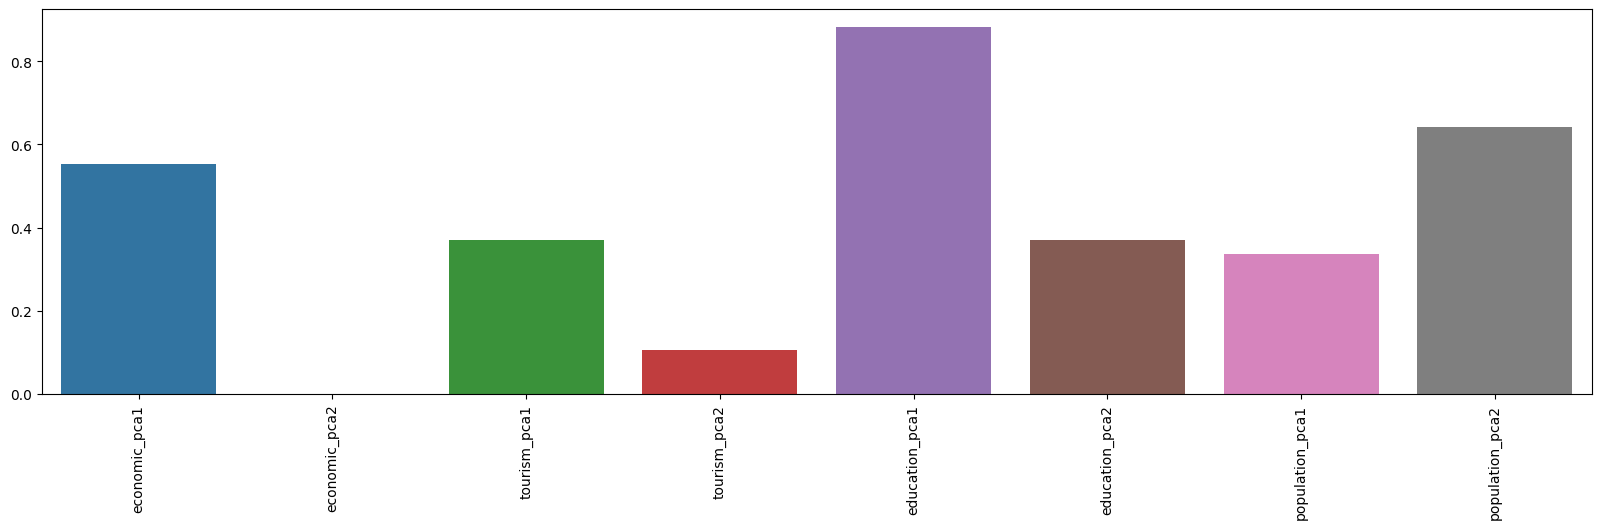

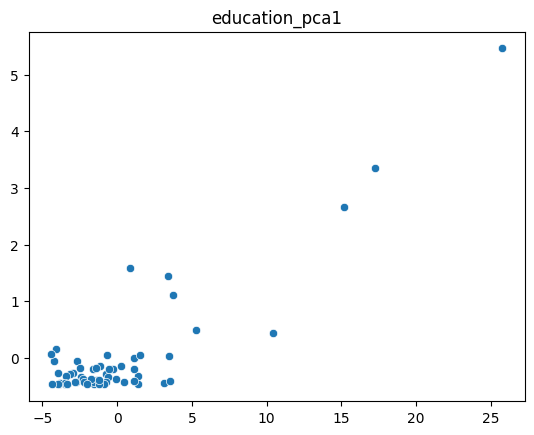

In [20]:
# Plotting Correlations for understanding linearity between features and target variable
import matplotlib.pyplot as plt
import seaborn as sns
corr_coefs = []
for idx in range(len(categories_cols)):
    corr = np.abs(np.corrcoef(data_pca_X[:, idx], data_y)[0, 1])
    if(pd.isnull(corr)):
        corr = 0
    corr_coefs.append(corr)
print('Coefficients: ', corr_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = categories_cols, y = corr_coefs, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()
sns.scatterplot(x = data_pca_X[:, np.argmax(corr_coefs)], y = data_y)
plt.title(categories_cols[np.argmax(corr_coefs)])
plt.show()

In [21]:
# Splitting into training & testing datasets for validation of model
all_idx = np.arange(data_pca_X.shape[0])
np.random.shuffle(all_idx)
train_test_split_idx = int(data_pca_X.shape[0] * 0.8)
train_idx = all_idx[:train_test_split_idx]
test_idx = all_idx[train_test_split_idx:]

In [22]:
# Fitting Linear Regression model
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(data_pca_X[train_idx, :], data_y[train_idx])

LinearRegression()

Coefficients:  [ 0.05977788  0.         -0.05127513 -0.03537752  0.17200125 -0.11505211
 -0.10343224  0.16333822]


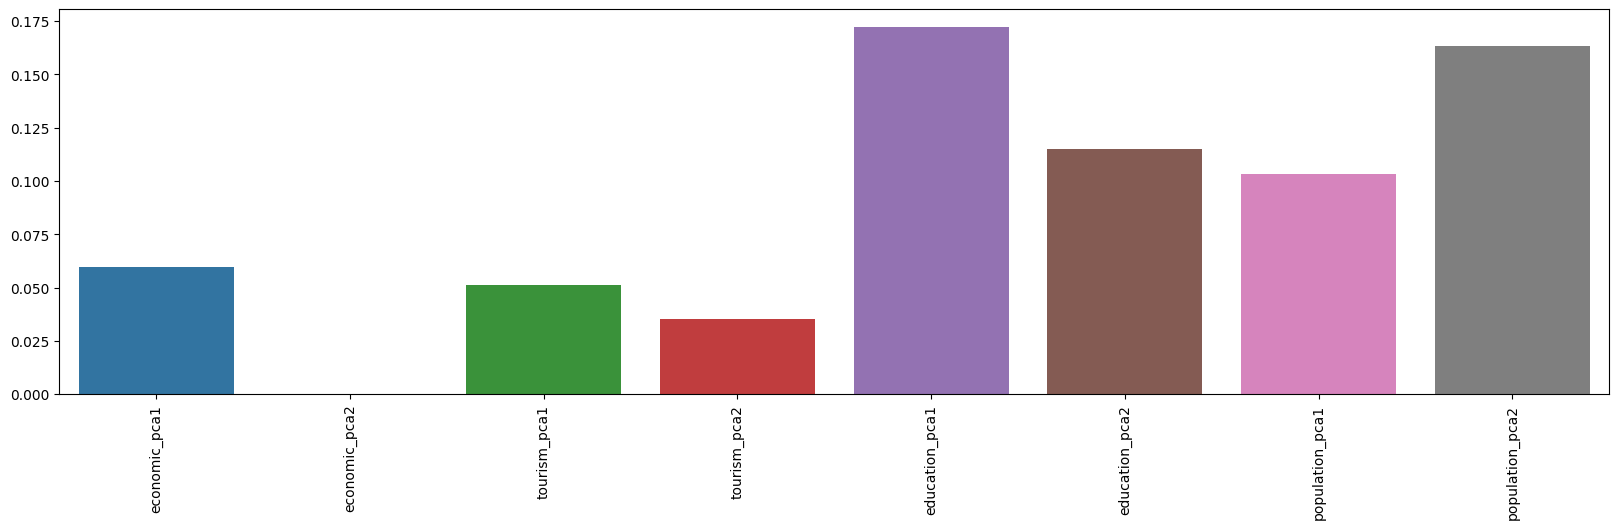

In [23]:
# Plotting Feature Importances for different features
model_coefs = model.coef_
print('Coefficients: ', model_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = categories_cols, y = np.abs(model_coefs), ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

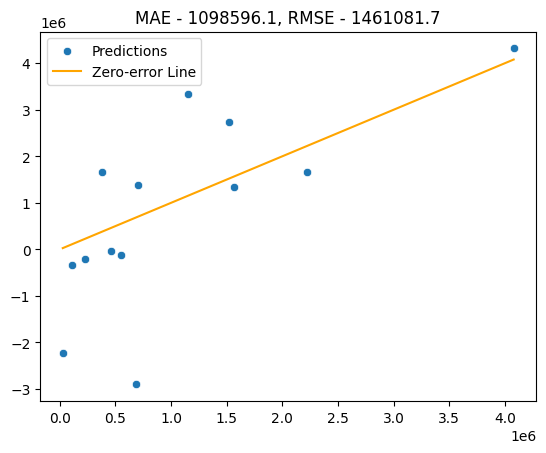

In [24]:
# Plotting validation results to judge performance of model
from sklearn import metrics
target_mean = cols_standardization_vals[target_feature[0]]['mean']
target_std = cols_standardization_vals[target_feature[0]]['std']
true = data_y[test_idx] * target_std + target_mean
pred = model.predict(data_pca_X[test_idx, :]) * target_std + target_mean
mae = metrics.mean_absolute_error(true, pred)
rmse = np.sqrt(metrics.mean_squared_error(true, pred))
sns.scatterplot(x = true, y = pred, label = 'Predictions')
sns.lineplot(x = true, y = true, label = 'Zero-error Line', color = 'orange')
plt.legend(loc = 'best')
plt.title(f"MAE - {mae:.1f}, RMSE - {rmse:.1f}")
plt.show()

In [25]:
# Fitting linear regression model with all datas and extracting coefficients of model
model = linear_model.LinearRegression()
model.fit(data_pca_X, data_y)
model_coefs = OrderedDict(zip(['intercept'] + categories_cols, [model.intercept_] + [*model.coef_]))

In [26]:
# Saving coefficients of Linear Regression model
# This will be used when making predictions in web server
import json
with open(f'./PreProcessed_Datasets/Models/CitySelectionModel_coefs.json', 'w') as save_file:
    json.dump(model_coefs, save_file)